In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('metadata.csv', index_col=0)
df

cellnames cellids grouping  time_continuous  time_discrete
C1           C1      C1       M3         0.450573              6
C10          C2     C10       M3         0.039540              1
C100         C3    C100       M2         0.737305             10
C1000        C4   C1000       M3         0.039540              1
C1001        C5   C1001       M3         0.340601              5
...         ...     ...      ...              ...            ...
C995      C2084    C995       M3         0.024364              1
C996      C2085    C996       M5         0.596329              8
C997      C2086    C997       M3         0.070741              1
C998      C2087    C998       M4         0.763953             10
C999      C2088    C999       M4         0.571382              8

[2064 rows x 5 columns]

In [3]:
# c = df['U']
g = df['grouping'].tolist()
set(g)

{'M1', 'M2', 'M3', 'M4', 'M5'}

In [4]:
types = ['M1', 'M2', 'M3', 'M4', 'M5']
types

['M1', 'M2', 'M3', 'M4', 'M5']

In [5]:
cellnames = df['cellnames'].tolist()
cellids = df['cellids'].tolist()

In [6]:
labels = [types.index(g[cellids.index(name)])+1 for name in cellnames]

In [7]:
pd.DataFrame(labels).to_csv('labels.csv', header=False, index=False)

In [8]:
data_df = pd.read_csv('data.csv', header='infer', index_col=0)
data_df

G1        G2        G3   G4        G5        G6   G7        G8  \
C1     0.000000  0.000000  0.000000  0.0  0.000000  3.483811  0.0  0.000000   
C2     5.721553  5.457081  0.000000  0.0  5.233251  0.000000  0.0  0.000000   
C3     0.000000  0.000000  2.207044  0.0  5.879621  0.000000  0.0  0.000000   
C4     0.000000  0.000000  0.000000  0.0  7.814207  0.000000  0.0  0.000000   
C5     5.240953  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
...         ...       ...       ...  ...       ...       ...  ...       ...   
C2084  0.000000  4.942189  0.000000  0.0  6.495522  0.000000  0.0  0.000000   
C2085  0.000000  0.000000  0.000000  0.0  6.321890  0.000000  0.0  5.418056   
C2086  0.000000  0.000000  0.000000  0.0  0.000000  0.000000  0.0  0.000000   
C2087  0.000000  0.000000  0.000000  0.0  5.724668  3.956668  0.0  0.000000   
C2088  0.000000  4.974759  0.000000  0.0  5.544347  5.573463  0.0  0.000000   

             G9       G10  ...      G492      G493      G494      G495  \
C1     3.840167  0.000000  ...  0.000000  5.050052  0.000000  0.000000   
C2     0.000000  4.714355  ...  0.000000  0.000000  0.000000  0.000000   
C3     0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
C4     0.000000  0.000000  ...  7.121855  0.000000  0.000000  2.887895   
C5     0.000000  0.000000  ...  0.000000  4.985529  0.000000  3.002291   
...         ...       ...  ...       ...       ...       ...       ...   
C2084  2.238139  0.000000  ...  0.000000  4.870656  2.633439  4.542710   
C2085  0.000000  5.662656  ...  0.000000  0.000000  0.000000  0.000000   
C2086  4.054602  5.354400  ...  0.000000  0.000000  0.000000  0.000000   
C2087  0.000000  5.752702  ...  0.000000  4.443093  0.000000  4.909445   
C2088  0.000000  4.019925  ...  0.000000  0.000000  0.000000  0.000000   

           G496      G497      G498      G499      G500      G501  
C1     4.189059  0.000000  0.000000  0.000000  0.000000  6.338645  
C2     2.597030  4.122159  0.000000  0.000000  0.000000  0.000000  
C3     0.000000  0.000000  0.000000  0.000000  4.718141  0.000000  
C4     0.000000  0.000000  0.000000  0.000000  0.000000  4.866332  
C5     4.518204  0.000000  0.000000  0.000000  4.674941  0.000000  
...         ...       ...       ...       ...       ...       ...  
C2084  0.000000  3.512236  0.000000  0.000000  5.167843  5.729290  
C2085  0.000000  6.149129  0.000000  5.596898  6.238094  0.000000  
C2086  4.389240  4.610330  3.895488  0.000000  5.384676  6.207113  
C2087  0.000000  0.000000  0.000000  0.000000  0.000000  5.261307  
C2088  4.631405  0.000000  3.106223  0.000000  0.000000  6.355255  

[2064 rows x 501 columns]

In [9]:
data = np.array(data_df)

In [10]:
from sklearn.decomposition import PCA
data = PCA(n_components=30).fit_transform(data)

In [11]:
data.shape

(2064, 30)

In [12]:
from sklearn.manifold import TSNE
X = TSNE(n_components=2).fit_transform(data)

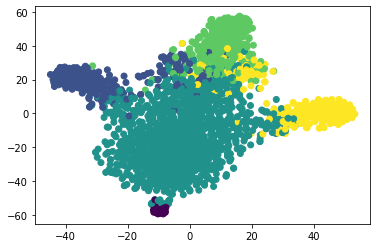

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(X[:,0], X[:,1], c=labels)